In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# 회귀분석
from statsmodels.formula.api import ols
# qqplot, 회귀분석의 상수항 추가
from statsmodels.api import qqplot, add_constant
# 선형 모델 formula(y ~ X1 + X2 + ...)
import statsmodels.formula.api as smf
# 다중공선성 확인
from statsmodels.stats.outliers_influence import variance_inflation_factor
# 선형회귀모형
from sklearn.linear_model import LinearRegression
# 변수 선택법(후진제거법)
from sklearn.feature_selection import RFE
# Scale 변환->표준화 회귀계수 산출
from sklearn.preprocessing import StandardScaler
# 평가함수
from statsmodels.tools.eval_measures import rmse
import matplotlib
# 패키지 불러오기
from sklearn.linear_model import Ridge, Lasso, ElasticNet
#from sklearn.tree import export_graphviz  환경 설정하기 어려움
#import graphviz

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
# 나무 구조 시각화  
from sklearn.tree import plot_tree
# 예측 / 회귀 random forest
from sklearn.ensemble import RandomForestClassifier
matplotlib.rc('font', family = 'Malgun Gothic') 
from sklearn.ensemble import GradientBoostingClassifier

#평가 함수
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error


# 선형회귀분석 (절편 추가)
import statsmodels.api as sm

#분류 모델 평가 함수
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report

# 의사결정나무_분류(유방암)

In [4]:
df_raw = pd.read_csv("C:/Users/USER/Desktop/포스코 청년 아카데미_B4_김민경/데이터 분석1/분석자료/유방암.CSV",encoding='euc-kr')
df_raw.head()

,diagnosis,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
0,음성,15.12,16.68,98.78,716.6,0.08876,0.09588,0.07550,0.04079,0.1594,...,17.77,20.24,117.70,989.5,0.14910,0.3331,0.3327,0.12520,0.3415,0.09740
1,양성,10.80,9.71,68.77,357.6,0.09594,0.05736,0.02531,0.01698,0.1381,...,11.60,12.02,73.66,414.0,0.14360,0.1257,0.1047,0.04603,0.2090,0.07699
2,음성,18.31,18.58,118.60,1041.0,0.08588,0.08468,0.08169,0.05814,0.1621,...,21.31,26.36,139.20,1410.0,0.12340,0.2445,0.3538,0.15710,0.3206,0.06938
3,양성,14.92,14.93,96.45,686.9,0.08098,0.08549,0.05539,0.03221,0.1687,...,17.18,18.22,112.00,906.6,0.10650,0.2791,0.3151,0.11470,0.2688,0.08273
4,양성,12.89,13.12,81.89,515.9,0.06955,0.03729,0.02260,0.01171,0.1337,...,13.62,15.54,87.40,577.0,0.09616,0.1147,0.1186,0.05366,0.2309,0.06915


In [5]:
df_raw.isnull().sum(axis = 0)

# 결측치 없음을 확인

diagnosis                  0
mean_radius                0
mean_texture               0
mean_perimeter             0
mean_area                  0
mean_smoothness            0
mean_compactness           0
mean_concavity             0
mean_concave_points        0
mean_symmetry              0
mean_fractal_dimension     0
radius_error               0
texture_error              0
perimeter_error            0
area_error                 0
smoothness_error           0
compactness_error          0
concavity_error            0
concave_points_error       0
symmetry_error             0
fractal_dimension_error    0
worst_radius               0
worst_texture              0
worst_perimeter            0
worst_area                 0
worst_smoothness           0
worst_compactness          0
worst_concavity            0
worst_concave_points       0
worst_symmetry             0
worst_fractal_dimension    0
dtype: int64

In [7]:
# 변수 역할 지정

df_raw_y = df_raw["diagnosis"] 
df_raw_y = np.where(df_raw_y == "음성", 0, 1)
df_raw_x = df_raw.drop(["diagnosis"], axis = 1, inplace = False)

In [8]:
df_raw_x.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
0,15.12,16.68,98.78,716.6,0.08876,0.09588,0.07550,0.04079,0.1594,0.05986,...,17.77,20.24,117.70,989.5,0.14910,0.3331,0.3327,0.12520,0.3415,0.09740
1,10.80,9.71,68.77,357.6,0.09594,0.05736,0.02531,0.01698,0.1381,0.06400,...,11.60,12.02,73.66,414.0,0.14360,0.1257,0.1047,0.04603,0.2090,0.07699
2,18.31,18.58,118.60,1041.0,0.08588,0.08468,0.08169,0.05814,0.1621,0.05425,...,21.31,26.36,139.20,1410.0,0.12340,0.2445,0.3538,0.15710,0.3206,0.06938
3,14.92,14.93,96.45,686.9,0.08098,0.08549,0.05539,0.03221,0.1687,0.05669,...,17.18,18.22,112.00,906.6,0.10650,0.2791,0.3151,0.11470,0.2688,0.08273
4,12.89,13.12,81.89,515.9,0.06955,0.03729,0.02260,0.01171,0.1337,0.05581,...,13.62,15.54,87.40,577.0,0.09616,0.1147,0.1186,0.05366,0.2309,0.06915


In [10]:
df_raw_y

array([0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1,

In [11]:
# train, test 분리 ( x: 설명변수 , y : 목표변수,)
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x ,# 설명변수
                                                                df_raw_y, # 목표변수
                                                               test_size= 0.4, random_state=1234)
print('train data X size : {}'.format(df_train_x.shape))
print('train data Y size : {}'.format(df_train_y.shape))
print('test data X size : {}'.format(df_test_x.shape))
print('test data Y size : {}'.format(df_test_y.shape))

train data X size : (192, 30)
train data Y size : (192,)
test data X size : (128, 30)
test data Y size : (128,)


In [12]:
tree_uncustomized = DecisionTreeClassifier(random_state = 1234)
tree_uncustomized.fit(df_train_x, df_train_y)

# train 데이터 설명력
print('Accuracy on training set : {:.3f}'.format(tree_uncustomized.score(df_train_x, df_train_y)))
# test 데이터 설명력
print('Accuracy on test set : {:.3f}'.format(tree_uncustomized.score(df_test_x, df_test_y)))

Accuracy on training set : 1.000
Accuracy on test set : 0.883


train 100% / test 88.3% 로 train데이터에 과적합이 발생했다.

In [14]:
train_accuracy= []
test_accuracy = []
# max_depth: 최대 깊이 변경
para_depth = [depth for depth in range(1, 11)]

for v_max_depth in para_depth:
    tree = DecisionTreeClassifier(random_state=1234, max_depth = v_max_depth)
    tree.fit(df_train_x, df_train_y)
    train_accuracy.append(tree.score(df_train_x, df_train_y))
    test_accuracy.append(tree.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_depth = pd.DataFrame()
df_accuracy_depth["Depth"] = para_depth
df_accuracy_depth["TrainAccuracy"] = train_accuracy
df_accuracy_depth["TestAccuracy"] = test_accuracy
df_accuracy_depth.round(3)

,Depth,TrainAccuracy,TestAccuracy
0,1,0.932,0.852
1,2,0.979,0.875
2,3,0.995,0.875
3,4,1.000,0.883
4,5,1.000,0.883
5,6,1.000,0.883
6,7,1.000,0.883
7,8,1.000,0.883
8,9,1.000,0.883
9,10,1.000,0.883


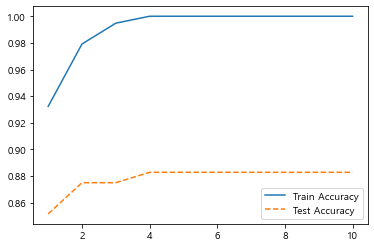

In [15]:
# 모델 설명력 그래프 확인
plt.plot(para_depth, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_depth, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.legend()

깊이가 증가함에 따라 모델릐 정확도가 4부터는 의미가 없어보인다.
깊이를 2와 4로 설정하겠다.

In [16]:
# 변수명 저장
v_feature_name = df_train_x.columns

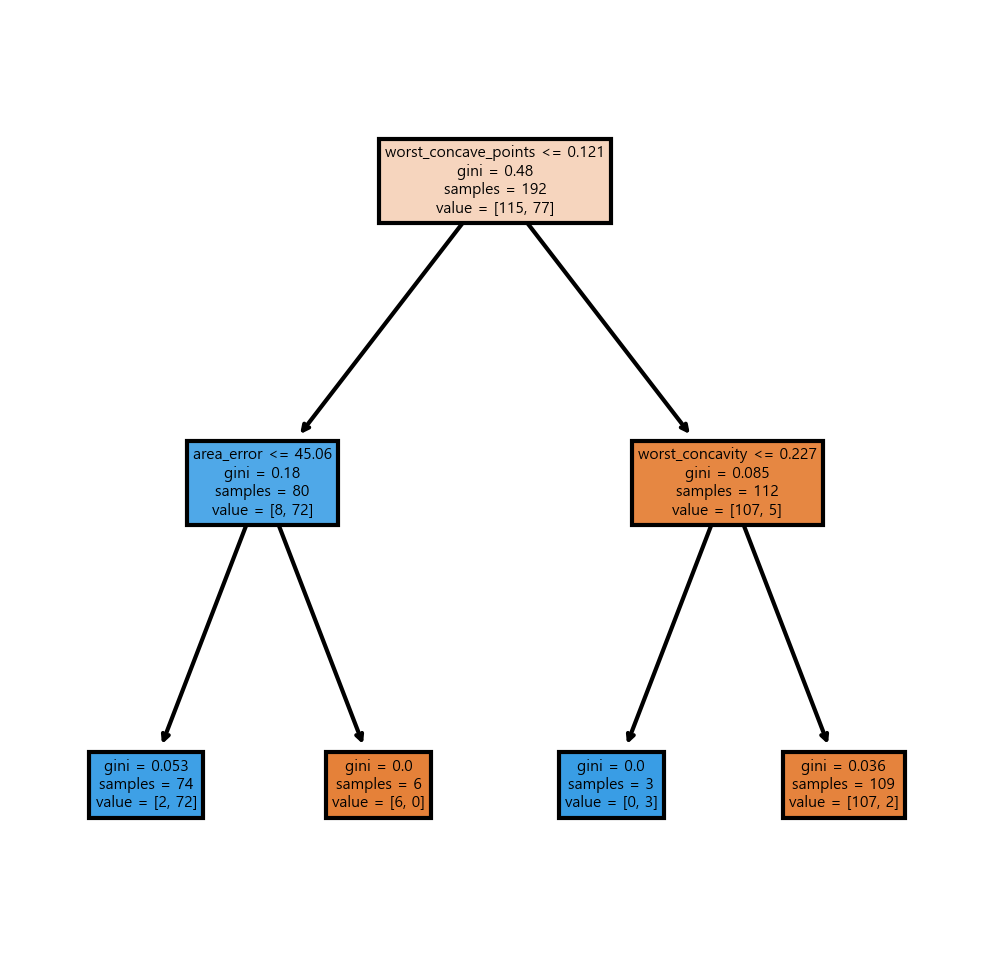

In [17]:
# 최대깊이 = 4모델
tree_low = DecisionTreeClassifier(random_state=1234, max_depth = 2 )
tree_low.fit(df_train_x, df_train_y)


fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4, 4), dpi=300)
plot_tree(tree_low, feature_names = v_feature_name, filled = True);

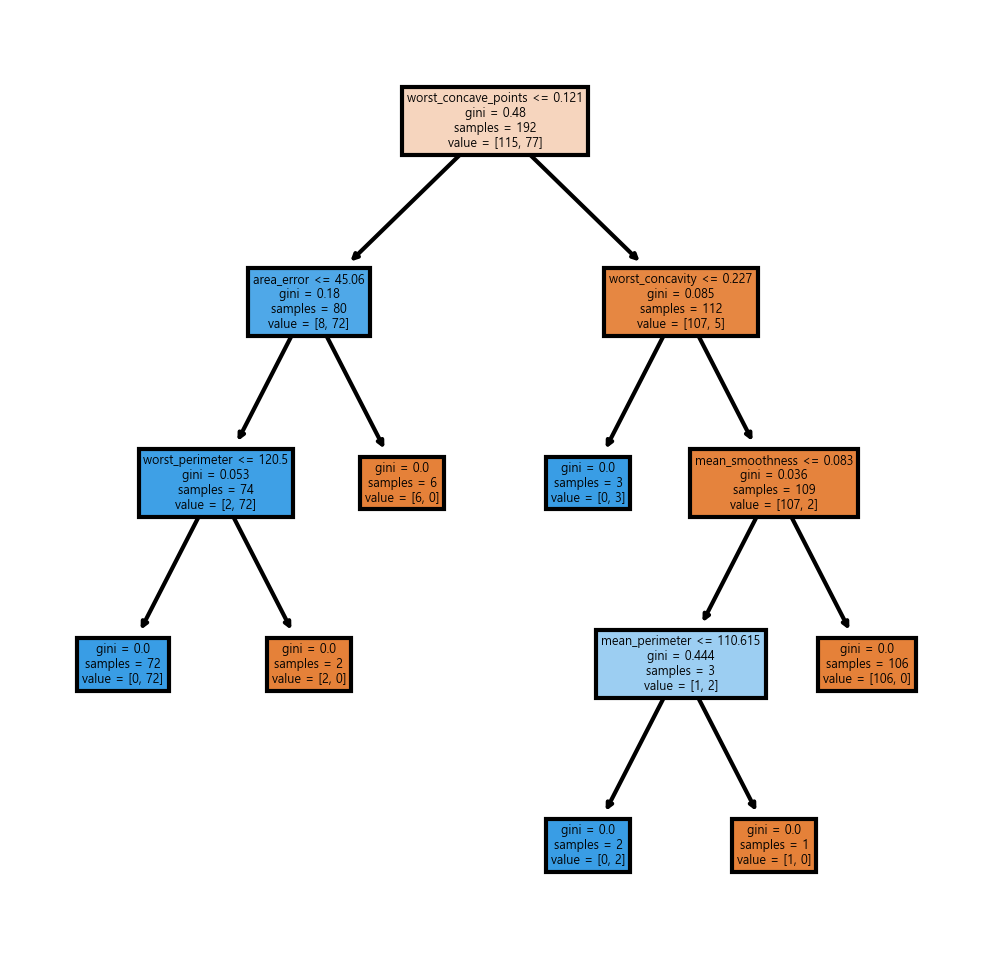

In [18]:
# 최대깊이 = 4모델
tree_low = DecisionTreeClassifier(random_state=1234, max_depth = 4 )
tree_low.fit(df_train_x, df_train_y)


fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4, 4), dpi=300)
plot_tree(tree_low, feature_names = v_feature_name, filled = True);

train과 test모두 높은 것은 깊이가 4일때이다. 파라미터 값을 2로 설정하면 과소적합이 발생할 것으로 예상된다. 

In [22]:
train_accuracy = [] 
test_accuracy = []
# min_samples_split: 분리 노드의 최소 자료 수 
para_split = [n_split *10 for n_split in range(1, 11)]

for v_min_samples_split in para_split:
    tree = DecisionTreeClassifier(random_state=1234, max_depth = 4
                                 , min_samples_split=v_min_samples_split )
    tree.fit(df_train_x, df_train_y)
    train_accuracy.append(tree.score(df_train_x, df_train_y))
    test_accuracy.append(tree.score(df_test_x, df_test_y))
# 결과 저장
df_accuracy_split = pd.DataFrame()
df_accuracy_split["MinSamplesSplit"] = para_split
df_accuracy_split["TrainAccuracy"] = train_accuracy
df_accuracy_split["TestAccuracy"] = test_accuracy
df_accuracy_split.round(3)

,MinSamplesSplit,TrainAccuracy,TestAccuracy
0,10,0.995,0.875
1,20,0.995,0.875
2,30,0.995,0.875
3,40,0.995,0.875
4,50,0.995,0.875
5,60,0.995,0.875
6,70,0.995,0.875
7,80,0.984,0.867
8,90,0.953,0.844
9,100,0.953,0.844


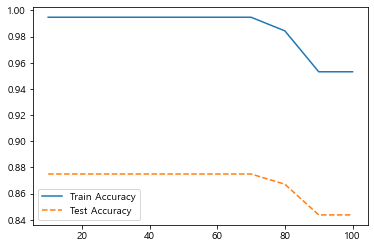

In [23]:
# 모델 설명력 그래프 확인
plt.plot(para_split, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_split, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.legend()

분리 노드의 최소 자료수가 증가함에 따라서 모델의 정확도는 감소한다.
파라미터 값을 70과 80일때를 비교해보겠다. 

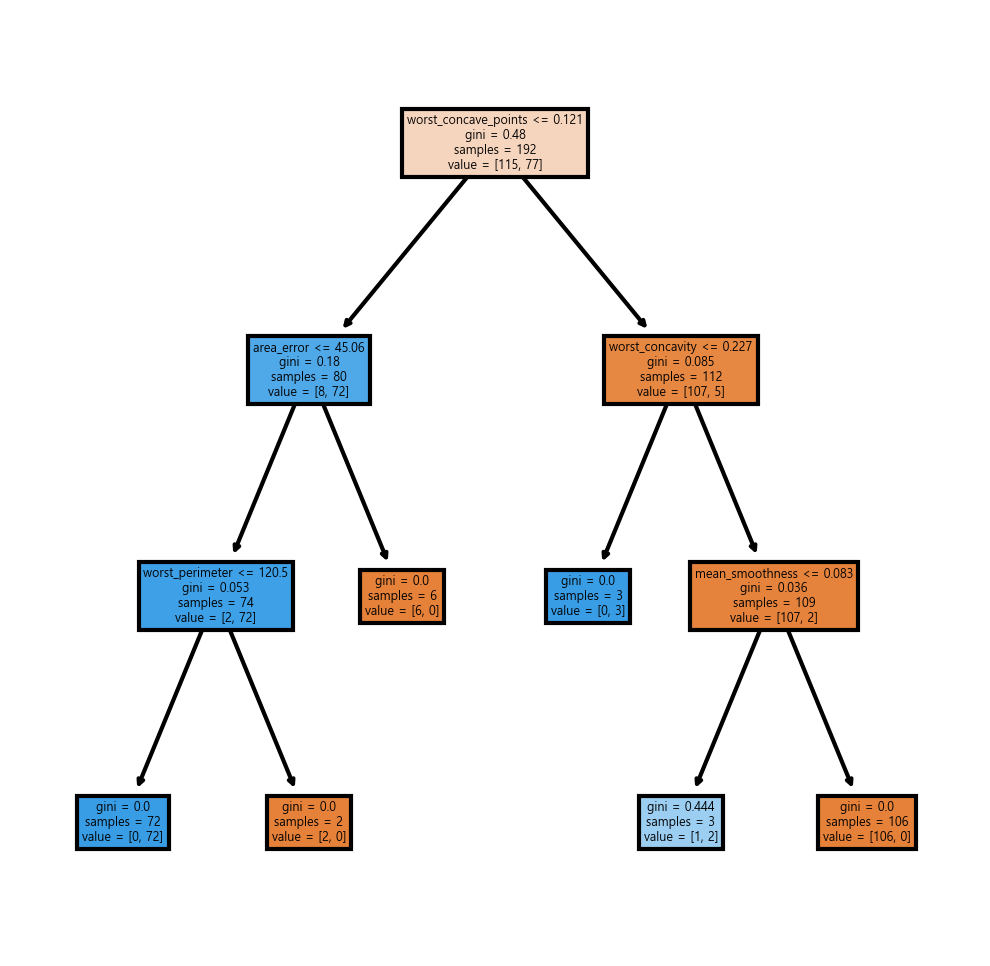

In [25]:
# 분리 보드의 최소 자료수가 70인 모델
tree_low = DecisionTreeClassifier(random_state=1234, max_depth = 4,min_samples_split=70 )
tree_low.fit(df_train_x, df_train_y)


fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4, 4), dpi=300)
plot_tree(tree_low, feature_names = v_feature_name, filled = True);

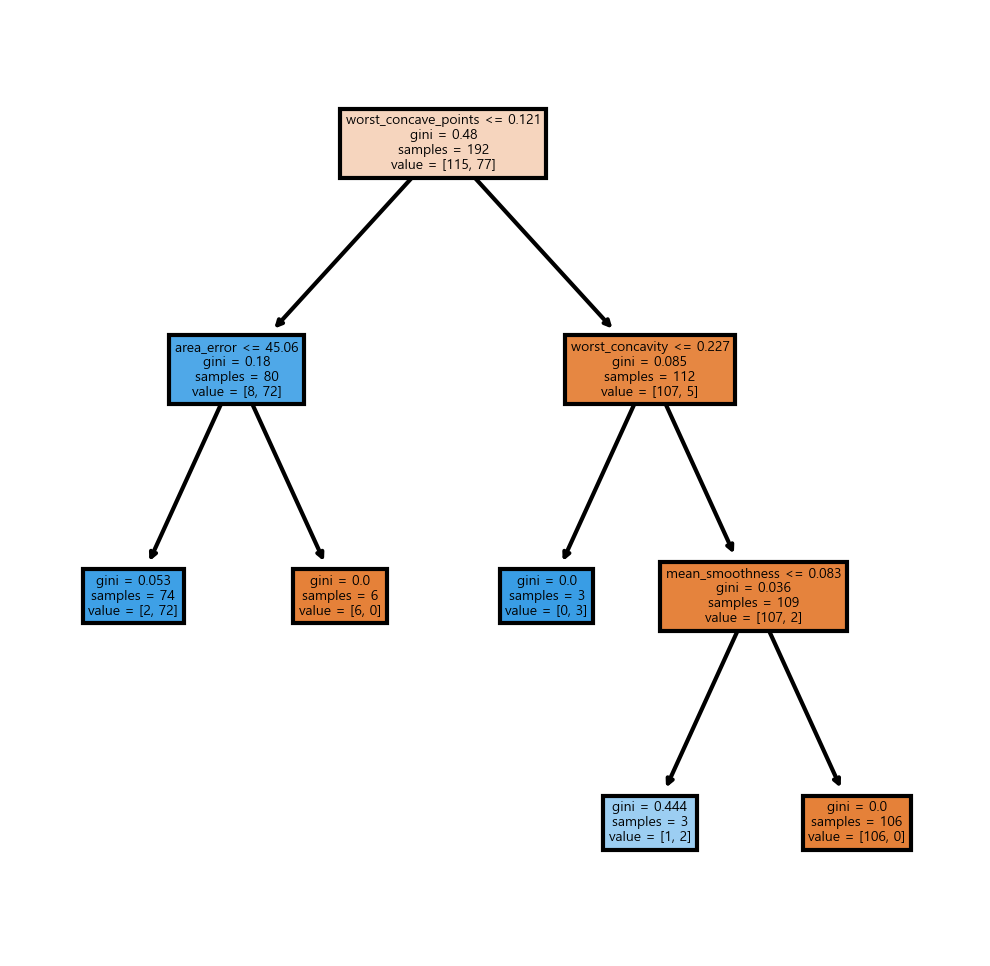

In [26]:
# 분리 보드의 최소 자료수가 80인 모델
tree_high = DecisionTreeClassifier(random_state=1234, max_depth = 4,min_samples_split=80 )
tree_high.fit(df_train_x, df_train_y)


fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4, 4), dpi=300)
plot_tree(tree_high, feature_names = v_feature_name, filled = True);

분리 노드의 최소 자료수가 증가함에 따라 과적합이 발생한다
트리를 보면 70이 더 균형적이라고 판단되어 파라미터 값을 70으로 설정한다.

In [27]:
train_accuracy =[]
test_accuracy=[]
#min_samples_leaf : 잎사귀 노드 최소 자료 수 제한
para_leaf = [n_leaf * 2 for n_leaf in range(1,11)]

for v_min_samples_leaf in para_leaf:
    tree = DecisionTreeClassifier(random_state = 1234, max_depth = 4, min_samples_split=70
                                , min_samples_leaf = v_min_samples_leaf)
    tree.fit(df_train_x, df_train_y)
    train_accuracy.append(tree.score(df_train_x, df_train_y))
    test_accuracy.append(tree.score(df_test_x, df_test_y))
    
df_accuracy_leaf = pd.DataFrame()
df_accuracy_leaf['MinSamplesLeaf'] = para_leaf
df_accuracy_leaf['Trainaccuracy'] = train_accuracy
df_accuracy_leaf['Testaccuracy'] = test_accuracy
df_accuracy_leaf.round(3)

,MinSamplesLeaf,Trainaccuracy,Testaccuracy
0,2,0.995,0.875
1,4,0.974,0.891
2,6,0.964,0.875
3,8,0.958,0.898
4,10,0.953,0.914
5,12,0.943,0.906
6,14,0.932,0.898
7,16,0.932,0.852
8,18,0.932,0.852
9,20,0.932,0.852


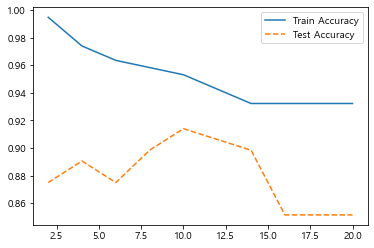

In [28]:
# 모델 설명력 그래프 확인
plt.plot(para_leaf, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_leaf, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.legend()

잎사귀 노드 최소 자료수 증가에 따라 모델 정확도가 증가했다가 감소하였다.
성능 변화를 고려하여 10이랑 14를 선택한다.

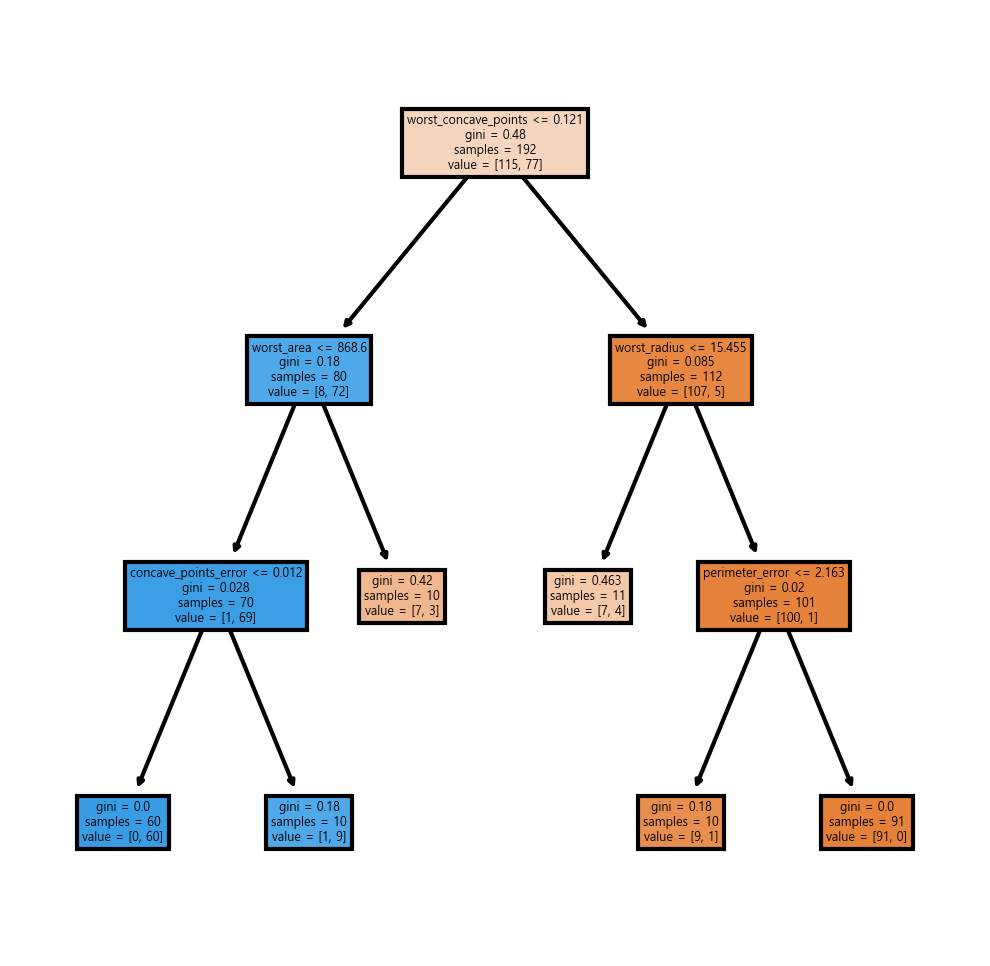

In [29]:
# 잎사귀 노드 최소 자료 수가 10인 모델
tree_low = DecisionTreeClassifier(random_state=1234, max_depth = 4,min_samples_split=70,min_samples_leaf=10 )
tree_low.fit(df_train_x, df_train_y)


fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4, 4), dpi=300)
plot_tree(tree_low, feature_names = v_feature_name, filled = True);

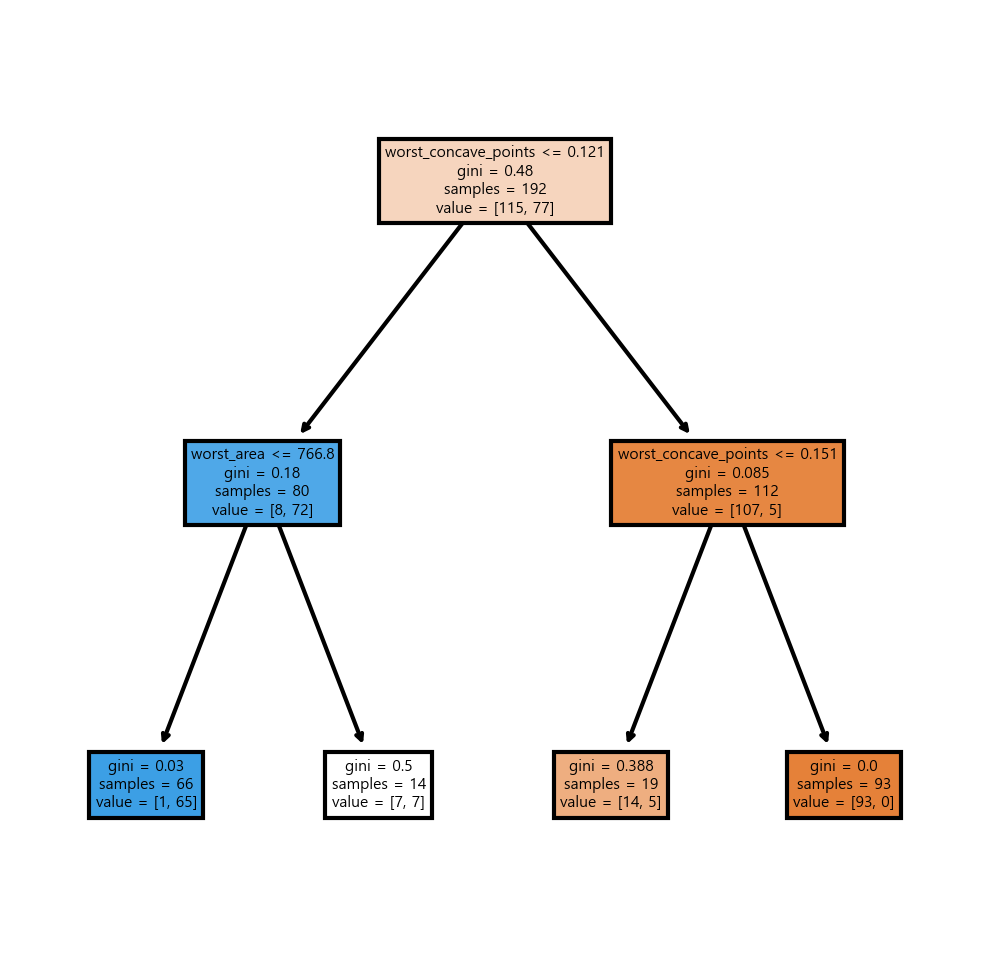

In [30]:
# 잎사귀 노드 최소 자료 수가 14인 모델
tree_high = DecisionTreeClassifier(random_state=1234, max_depth = 4,min_samples_split=80,min_samples_leaf=14 )
tree_high.fit(df_train_x, df_train_y)


fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4, 4), dpi=300)
plot_tree(tree_high, feature_names = v_feature_name, filled = True);

test의 정확도가 가장 높고 train의 정확도가 차이가 많이 나지 않는 것을 고려하여 파라미터 값을 10으로 고정한다

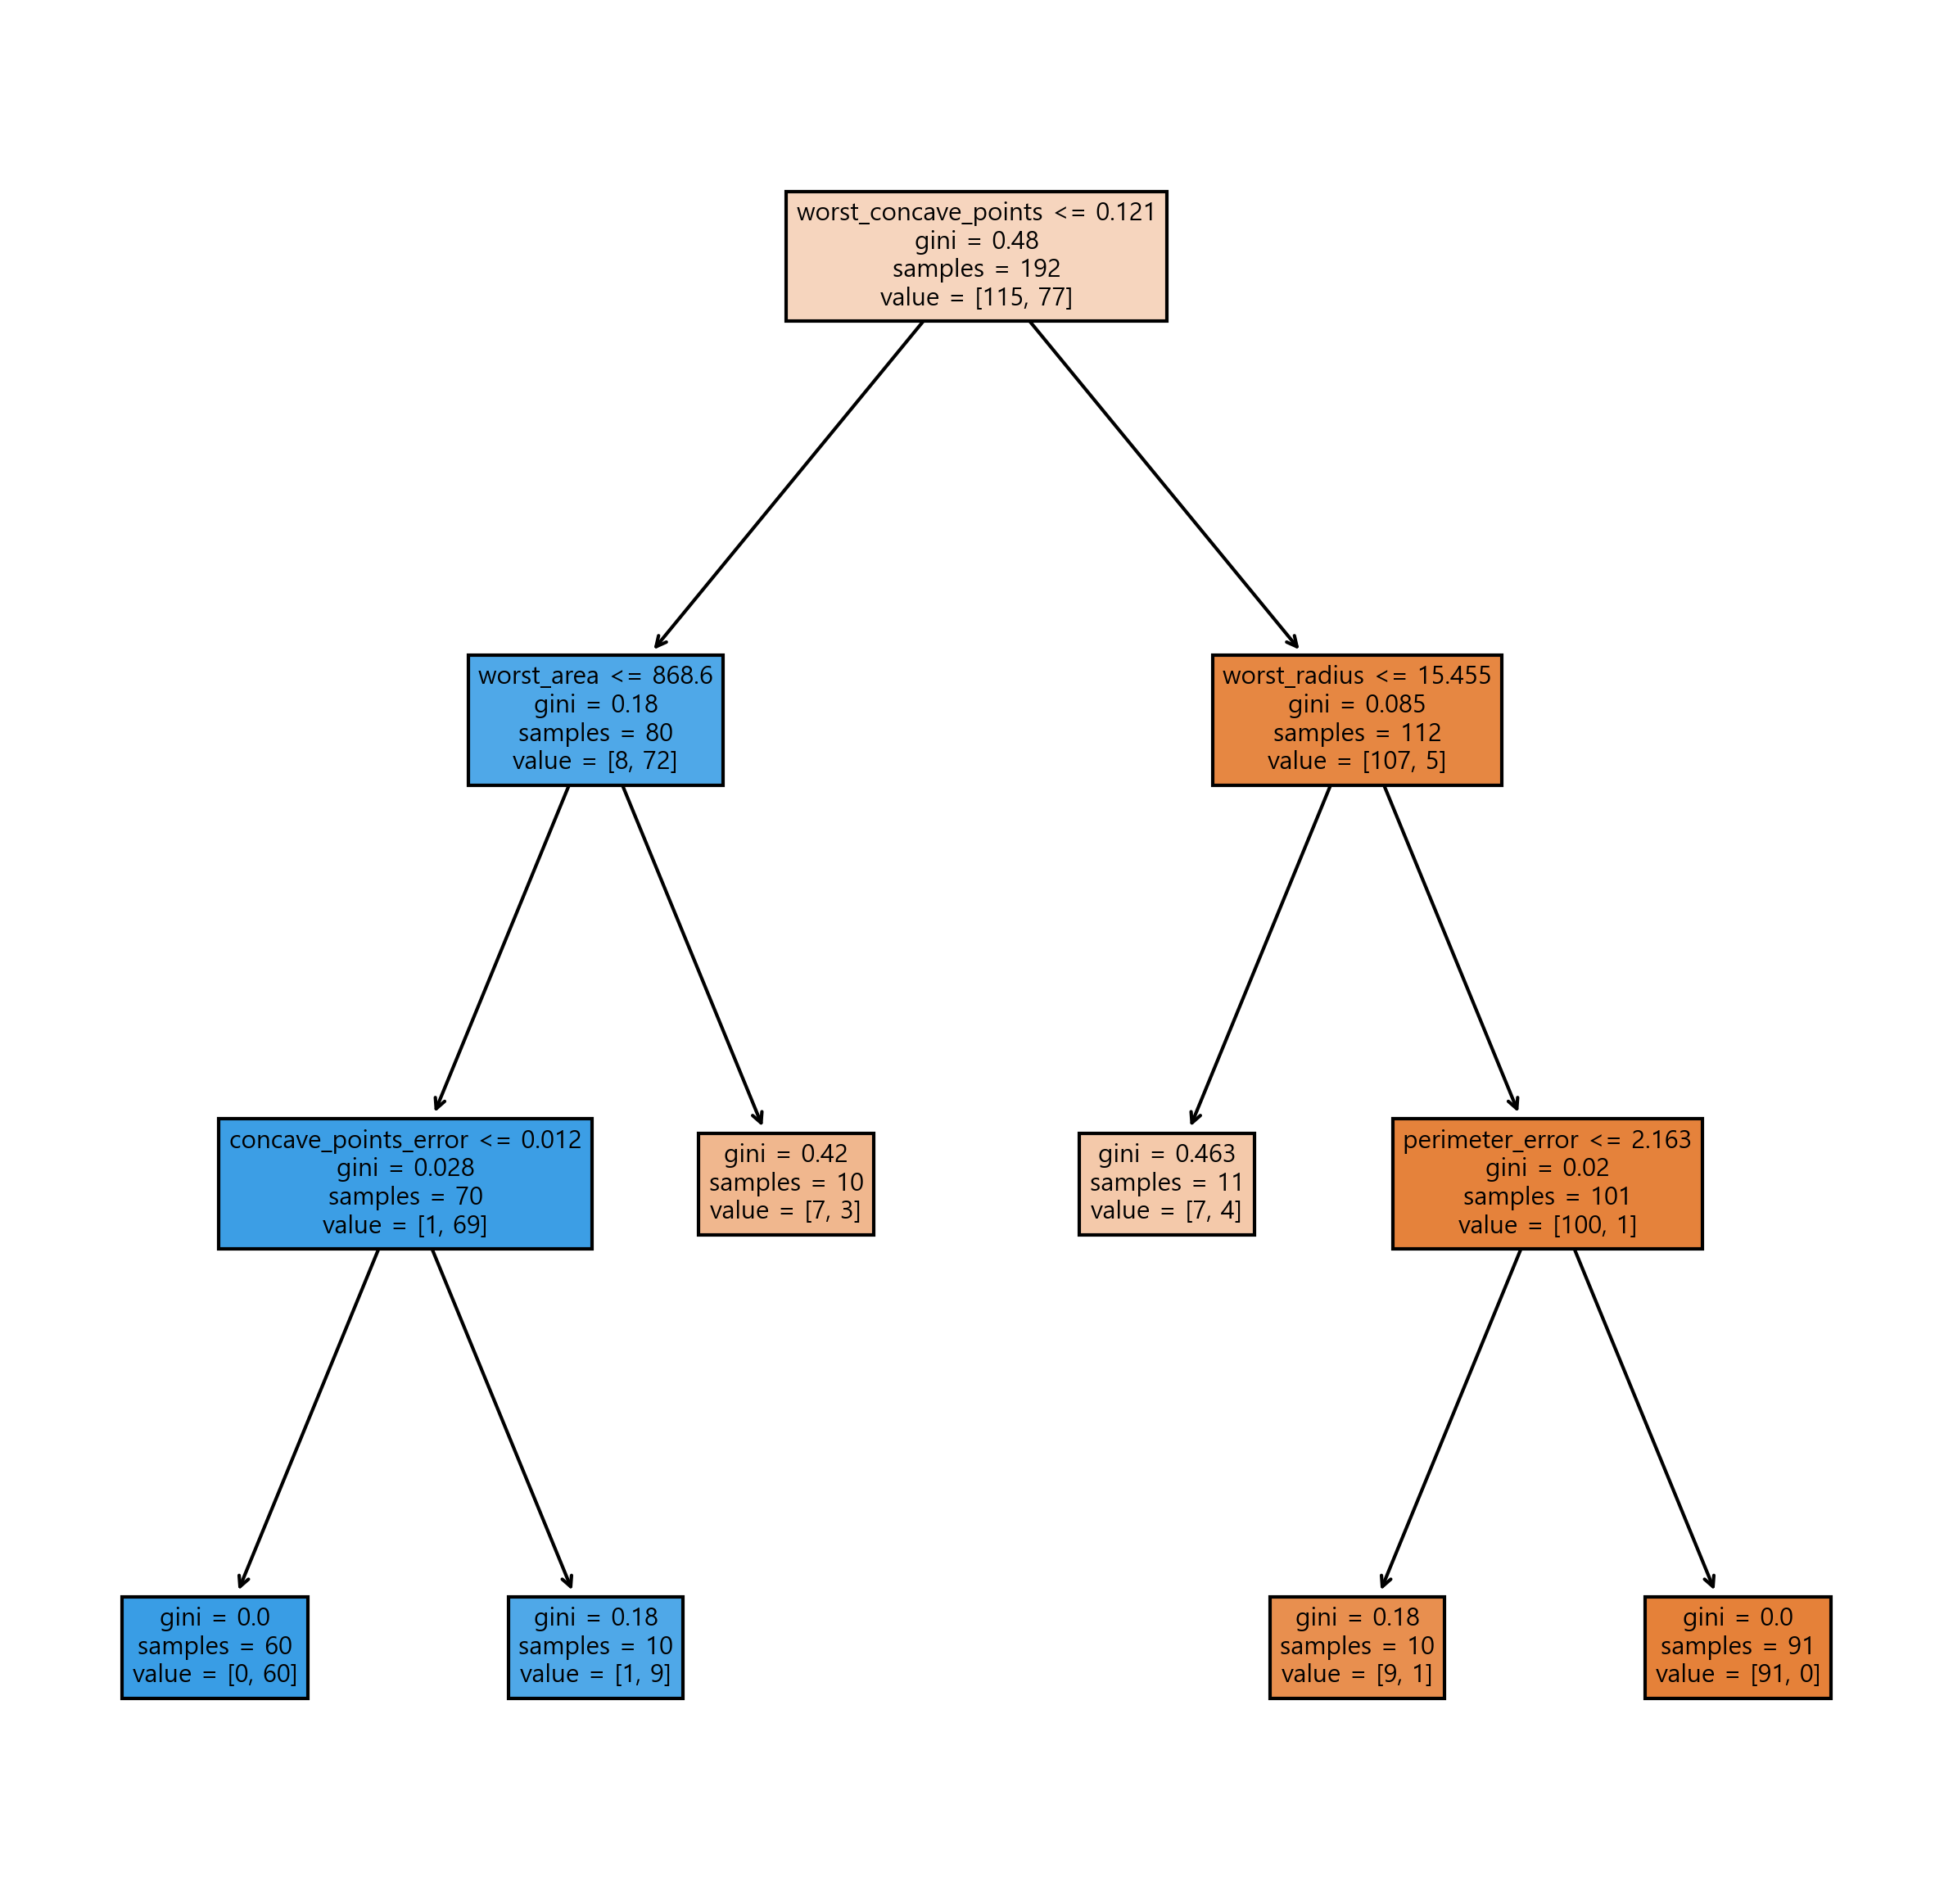

In [31]:
# 최종 모델
tree_final =DecisionTreeClassifier(min_samples_leaf = 10, min_samples_split = 70, max_depth = 4, random_state=1234 )
tree_final.fit(df_train_x, df_train_y)

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (10, 10), dpi=300)
plot_tree(tree_final, feature_names = v_feature_name, filled = True);


루트 로드에 115개의 음성데이터와 77개의 양성데이터가 들어있다.
worst concave points ( 세포의 오목한 점의 수) 가 0.121 이하인 경우 왼쪽으로 이동하고 이상인 경우 오른쪽으로 이동한다.guni 지수는 감소했음을 알 수 있다. 
worst radius(세포의 최대 반경)이 15.455 이하인경우 음성으로 분리한다. 
worst area(세포의 최대 면적) 이 868.6 이상인 경우 음성으로 분리한다. 

In [34]:
# 평가
y_pred = tree_final.predict(df_test_x)

print('Accuracy : {:.3f}'.format(tree_final.score(df_test_x, df_test_y)))
print('Confusion matrix : \n{}'.format(confusion_matrix(df_test_y, y_pred)))
print(classification_report(df_test_y,y_pred, digits = 3))

Accuracy : 0.914
Confusion matrix : 
[[94  3]
 [ 8 23]]
              precision    recall  f1-score   support

           0      0.922     0.969     0.945        97
           1      0.885     0.742     0.807        31

    accuracy                          0.914       128
   macro avg      0.903     0.856     0.876       128
weighted avg      0.913     0.914     0.911       128



실제 0을 0으로 잘 분류한 것이 94건, 실제 1을 0으로 분류한것은 8건이다.
실제 1을 1로 분류한 것이 23건, 실제 0을 1로 분류한것이 3건이다.
정확도는 91.4% 이며 test 데이터를 잘 분류한다고 할 수 있다.
정밀도는 88.5% 이며 민감도도 74.2%로 높다. f1 score도 80.7%로 높게 나왔습니다.

test 데이터들을 잘 분류하는 좋은 모델이라고 판단됩니다.

In [35]:
# tree.feature_importances_로 설명변수 중요도 확인 및 테이블로 저장
df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["Importance"] = tree_final.feature_importances_

# df_feature_importance의 테이블을 중요도별로 정렬
df_importance.sort_values("Importance", ascending=False, inplace = True)
df_importance.round(3)

,Feature,Importance
27,worst_concave_points,0.861
23,worst_area,0.104
20,worst_radius,0.031
12,perimeter_error,0.002
17,concave_points_error,0.002
0,mean_radius,0.000
16,concavity_error,0.000
28,worst_symmetry,0.000
26,worst_concavity,0.000
25,worst_compactness,0.000


Text(0, 0.5, '설명변수')

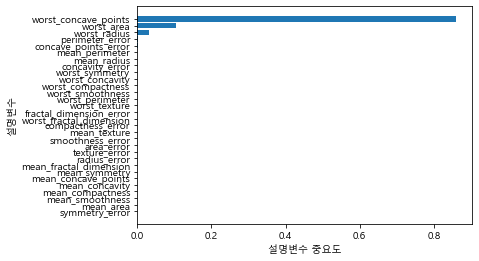

In [36]:
# 중요도가 높은 변수를 상위에 그림
df_importance.sort_values("Importance", ascending=True, inplace = True)
coordinates = range(len(df_importance))
plt.barh(y = coordinates, width = df_importance["Importance"])
plt.yticks(coordinates, df_importance["Feature"])
plt.xlabel("설명변수 중요도")
plt.ylabel("설명변수")

worst concave points ( 세포의 오목한 점의 수) , worst area(세포의 최대 면적), worst radius(세포의 최대 반경)순으로 영향이 크다고 해석 할 수 있습니다.

단, 계산된 변수 중요도 값이 낮거나 0이더라도 선택되는 훈련 데이터에 따라 중요도는 변경될 수 있습니다.

In [37]:
# GridSearchCV를 이용한 최적 parameter 찾기
estimator =DecisionTreeClassifier()
# 구하고자 하는 parameter와 범위
param_grid = {"max_depth": para_depth, "min_samples_split": para_split,
              "min_samples_leaf": para_leaf}
# 설명력이 높은 최적 parameter 찾기
grid_dt = GridSearchCV(estimator, param_grid, scoring="accuracy", n_jobs = -1)
grid_dt.fit(df_train_x, df_train_y)

print("best estimator model: \n{}".format(grid_dt.best_estimator_))
print("\nbest parameter: \n{}".format(grid_dt.best_params_))
print("\nbest score: \n{}".format(grid_dt.best_score_.round(3)))

best estimator model: 
DecisionTreeClassifier(max_depth=4, min_samples_leaf=2, min_samples_split=10)

best parameter: 
{'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 10}

best score: 
0.943


최대깊이가 4, 잎사귀의 최소 샘플수가 2, 분리 보드의 최소 자료수가 10 일때 정확도는 94.3% 인 것을 알 수있습니다

# 랜덤 포레스트_분류(유방암)

In [41]:
df_raw = pd.read_csv("C:/Users/USER/Desktop/포스코 청년 아카데미_B4_김민경/데이터 분석1/분석자료/유방암.CSV",encoding='euc-kr')
df_raw.head()

,diagnosis,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
0,음성,15.12,16.68,98.78,716.6,0.08876,0.09588,0.07550,0.04079,0.1594,...,17.77,20.24,117.70,989.5,0.14910,0.3331,0.3327,0.12520,0.3415,0.09740
1,양성,10.80,9.71,68.77,357.6,0.09594,0.05736,0.02531,0.01698,0.1381,...,11.60,12.02,73.66,414.0,0.14360,0.1257,0.1047,0.04603,0.2090,0.07699
2,음성,18.31,18.58,118.60,1041.0,0.08588,0.08468,0.08169,0.05814,0.1621,...,21.31,26.36,139.20,1410.0,0.12340,0.2445,0.3538,0.15710,0.3206,0.06938
3,양성,14.92,14.93,96.45,686.9,0.08098,0.08549,0.05539,0.03221,0.1687,...,17.18,18.22,112.00,906.6,0.10650,0.2791,0.3151,0.11470,0.2688,0.08273
4,양성,12.89,13.12,81.89,515.9,0.06955,0.03729,0.02260,0.01171,0.1337,...,13.62,15.54,87.40,577.0,0.09616,0.1147,0.1186,0.05366,0.2309,0.06915


In [42]:
df_raw.isnull().sum(axis = 0)

diagnosis                  0
mean_radius                0
mean_texture               0
mean_perimeter             0
mean_area                  0
mean_smoothness            0
mean_compactness           0
mean_concavity             0
mean_concave_points        0
mean_symmetry              0
mean_fractal_dimension     0
radius_error               0
texture_error              0
perimeter_error            0
area_error                 0
smoothness_error           0
compactness_error          0
concavity_error            0
concave_points_error       0
symmetry_error             0
fractal_dimension_error    0
worst_radius               0
worst_texture              0
worst_perimeter            0
worst_area                 0
worst_smoothness           0
worst_compactness          0
worst_concavity            0
worst_concave_points       0
worst_symmetry             0
worst_fractal_dimension    0
dtype: int64

In [43]:
# 변수 역할 지정

df_raw_y = df_raw["diagnosis"] 
df_raw_y = np.where(df_raw_y == "음성", 0, 1)
df_raw_x = df_raw.drop(["diagnosis"], axis = 1, inplace = False)

In [44]:
# train, test 분리 ( x: 설명변수 , y : 목표변수,)
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x ,# 설명변수
                                                                df_raw_y, # 목표변수
                                                               test_size= 0.4, random_state=1234)
print('train data X size : {}'.format(df_train_x.shape))
print('train data Y size : {}'.format(df_train_y.shape))
print('test data X size : {}'.format(df_test_x.shape))
print('test data Y size : {}'.format(df_test_y.shape))

train data X size : (192, 30)
train data Y size : (192,)
test data X size : (128, 30)
test data Y size : (128,)


In [45]:
rf_uncustomized = RandomForestClassifier(random_state = 1234)
rf_uncustomized.fit(df_train_x, df_train_y)

# train 데이터 설명력
print('Accuracy on training set : {:.3f}'.format(tree_uncustomized.score(df_train_x, df_train_y)))
# test 데이터 설명력
print('Accuracy on test set : {:.3f}'.format(tree_uncustomized.score(df_test_x, df_test_y)))

Accuracy on training set : 1.000
Accuracy on test set : 0.883


train 100% / test 88.3% 로 train데이터에 과적합이 발생했다.

In [46]:
train_accuracy =[]
test_accuracy=[]

para_n_tree = [n_tree * 10 for n_tree in range(1,16)]

for v_n_estimators in para_n_tree:
    rf = RandomForestClassifier(random_state = 1234,n_estimators =v_n_estimators )
    rf.fit(df_train_x, df_train_y)
    train_accuracy.append(rf.score(df_train_x, df_train_y))
    test_accuracy.append(rf.score(df_test_x, df_test_y))
    
df_accuracy_n = pd.DataFrame()
df_accuracy_n['n_estimators'] = para_n_tree
df_accuracy_n['TrainAccuracy'] = train_accuracy
df_accuracy_n['TestAccuracy'] = test_accuracy
df_accuracy_n.round(3)

,n_estimators,TrainAccuracy,TestAccuracy
0,10,1.000,0.922
1,20,0.995,0.906
2,30,1.000,0.914
3,40,1.000,0.914
4,50,1.000,0.922
5,60,1.000,0.922
6,70,1.000,0.914
7,80,1.000,0.914
8,90,1.000,0.922
9,100,1.000,0.922


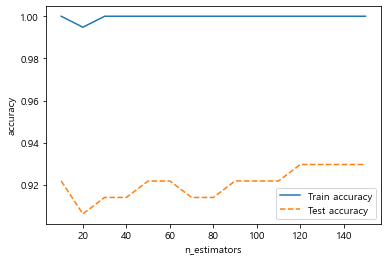

In [47]:
# 모델 설몀력 그래프 확인
plt.plot(para_n_tree, train_accuracy, linestyle = '-', label = 'Train accuracy')
plt.plot(para_n_tree, test_accuracy, linestyle = '--', label = 'Test accuracy')
plt.ylabel('accuracy')
plt.xlabel('n_estimators')
plt.legend()

결정 트리수 증가에 따라서 모델의 정확도는 증가하며 성능 변화를 고려하여 120으로 설정해준다.

In [48]:
oob_error = []

for v_n_estimators in range(1, 151):
    rf = RandomForestClassifier(random_state = 1234,n_estimators =v_n_estimators ,oob_score=True)
    rf.fit(df_train_x, df_train_y)
    oob_error.append(1- rf.oob_score_)

C:\Users\USER\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:541: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\USER\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:545: RuntimeWarning: invalid value encountered in true_divide
  decision = (predictions[k] /
C:\Users\USER\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:541: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\USER\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:545: RuntimeWarning: invalid value encountered in true_divide
  decision = (predictions[k] /
C:\Users\USER\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:541: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used 

Text(0.5, 0, 'n_estimators')

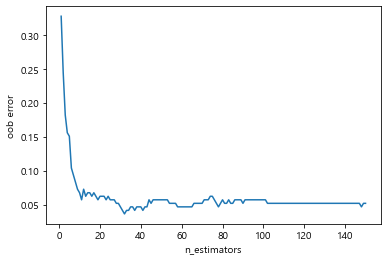

In [49]:
plt.plot(range(1, 151), oob_error)
plt.ylabel('oob error')
plt.xlabel('n_estimators')

결정트리수가 증가함에 따라서 oob오류는 감소함을 볼 수있다. 

In [50]:
train_accuracy= []
test_accuracy = []
# max_depth: 최대 깊이 변경
para_depth = [depth for depth in range(1, 11)]

for v_max_depth in para_depth:
    rf = RandomForestClassifier(random_state=1234, max_depth = v_max_depth,n_estimators = 120)
    rf.fit(df_train_x, df_train_y)
    train_accuracy.append(rf.score(df_train_x, df_train_y))
    test_accuracy.append(rf.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_depth = pd.DataFrame()
df_accuracy_depth["Depth"] = para_depth
df_accuracy_depth["TrainAccuracy"] = train_accuracy
df_accuracy_depth["TestAccuracy"] = test_accuracy
df_accuracy_depth.round(3)

,Depth,TrainAccuracy,TestAccuracy
0,1,0.953,0.914
1,2,0.979,0.906
2,3,0.990,0.906
3,4,1.000,0.922
4,5,1.000,0.930
5,6,1.000,0.930
6,7,1.000,0.930
7,8,1.000,0.930
8,9,1.000,0.930
9,10,1.000,0.930


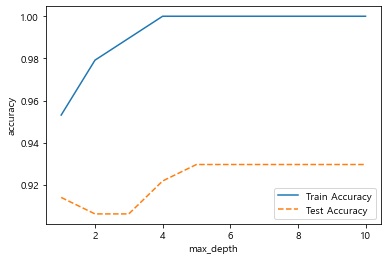

In [51]:
# 모델 설명력 그래프 확인
plt.plot(para_depth, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_depth, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.ylabel('accuracy')
plt.xlabel('max_depth')
plt.legend()

깊이가 증가함에 따라 모델릐 정확도가 증가하다가 5부터는 의미가 없어보인다.
깊이를 5로 설정하겠다.

In [53]:
train_accuracy = [] 
test_accuracy = []
# min_samples_split: 분리 노드의 최소 자료 수 
para_split = [n_split * 10 for n_split in range(1, 11)]

for v_min_samples_split in para_split:
    rf = RandomForestClassifier(random_state=1234, max_depth = 5, n_estimators = 120
                                 , min_samples_split=v_min_samples_split )
    rf.fit(df_train_x, df_train_y)
    train_accuracy.append(rf.score(df_train_x, df_train_y))
    test_accuracy.append(rf.score(df_test_x, df_test_y))
# 결과 저장
df_accuracy_split = pd.DataFrame()
df_accuracy_split["MinSamplesSplit"] = para_split
df_accuracy_split["Trainaccuracy"] = train_accuracy
df_accuracy_split["Testaccuracy"] = test_accuracy
df_accuracy_split.round(3)

,MinSamplesSplit,Trainaccuracy,Testaccuracy
0,10,0.995,0.914
1,20,0.984,0.914
2,30,0.984,0.914
3,40,0.984,0.906
4,50,0.990,0.906
5,60,0.964,0.883
6,70,0.953,0.891
7,80,0.953,0.914
8,90,0.953,0.914
9,100,0.953,0.914


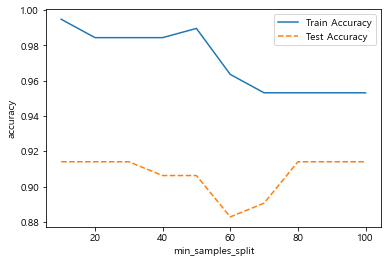

In [54]:
# 모델 설명력 그래프 확인
plt.plot(para_split, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_split, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.ylabel('accuracy')
plt.xlabel('min_samples_split')
plt.legend()

분리 노드의 최소 자료수가 증가함에 따라서 모델의 정확도는 감소하다가 다시 증가한다.
파라미터 값을 80일때으로 설정한다. 

In [55]:
train_accuracy =[]
test_accuracy=[]
# 잎사귀 노드의 최소 자료수
para_leaf = [n_leaf * 10 for n_leaf in range(1,11)]

for v_min_samples_leaf in para_leaf:
    rf = RandomForestClassifier(random_state = 1234, max_depth = 5, min_samples_split=80,n_estimators = 120
                                , min_samples_leaf = v_min_samples_leaf)
    rf.fit(df_train_x, df_train_y)
    train_accuracy.append(rf.score(df_train_x, df_train_y))
    test_accuracy.append(rf.score(df_test_x, df_test_y))
    
df_accuracy_leaf = pd.DataFrame()
df_accuracy_leaf['MinSamplesLeaf'] = para_leaf
df_accuracy_leaf['Trainaccuracy'] = train_accuracy
df_accuracy_leaf['Testaccuracy'] = test_accuracy
df_accuracy_leaf.round(3)

,MinSamplesLeaf,Trainaccuracy,Testaccuracy
0,10,0.953,0.914
1,20,0.953,0.914
2,30,0.953,0.914
3,40,0.953,0.906
4,50,0.964,0.906
5,60,0.948,0.930
6,70,0.599,0.758
7,80,0.599,0.758
8,90,0.599,0.758
9,100,0.599,0.758


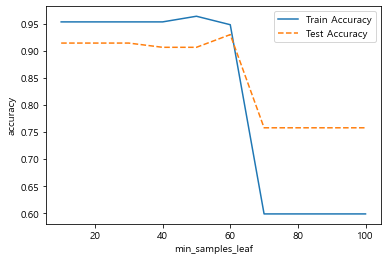

In [56]:
# 모델 설명력 그래프 확인
plt.plot(para_leaf, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_leaf, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.ylabel('accuracy')
plt.xlabel('min_samples_leaf')
plt.legend()

잎사귀 노드 최소 자료수가 증가함에따라 모델의 정확도는 감소한다.
파마리터 값을 60으로 설정한다.

In [57]:
rf_final = RandomForestClassifier(min_samples_leaf = 60, min_samples_split = 80, max_depth = 5, random_state=1234,
                                n_estimators =120)
rf_final.fit(df_train_x, df_train_y)
y_pred = rf_final.predict(df_test_x)

# train 데이터 설명력
print('Accuracy on training set : {:.3f}'.format(rf_final.score(df_train_x, df_train_y)))
# test 데이터 설명력
print('Accuracy on test set : {:.3f}'.format(rf_final.score(df_test_x, df_test_y)))
print('Confusion matrix : \n{}'.format(confusion_matrix(df_test_y, y_pred)))
print(classification_report(df_test_y,y_pred, digits = 3))

Accuracy on training set : 0.948
Accuracy on test set : 0.930
Confusion matrix : 
[[90  7]
 [ 2 29]]
              precision    recall  f1-score   support

           0      0.978     0.928     0.952        97
           1      0.806     0.935     0.866        31

    accuracy                          0.930       128
   macro avg      0.892     0.932     0.909       128
weighted avg      0.936     0.930     0.931       128



train과 test의 정분류율이 각각 94.8%, 93%로 비슷한 수준이다. 안정적인 모델이라고 해석할 수 있다.

정밀도는 80.6% 민감도도 93.5%로 높고 f1 score도 86.6%로 높다.

실제 0을 0으로 잘 분류한 것이 90건, 실제 1을 0으로 분류한것은 2건이다.

실제 1을 1로 분류한 것이 29건, 실제 0을 1로 분류한것이 7건이다.

In [58]:
# 변수명
v_feature_name = df_train_x.columns
# tree.feature_importances_로 설명변수 중요도 확인 및 테이블로 저장
df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["Importance"] = rf_final.feature_importances_

# df_feature_importance의 테이블을 중요도별로 정렬
df_importance.sort_values("Importance", ascending=False, inplace = True)
df_importance.round(3)

,Feature,Importance
22,worst_perimeter,0.182
6,mean_concavity,0.169
27,worst_concave_points,0.130
7,mean_concave_points,0.091
20,worst_radius,0.091
2,mean_perimeter,0.078
23,worst_area,0.078
3,mean_area,0.052
0,mean_radius,0.026
17,concave_points_error,0.026


Text(0, 0.5, '설명변수')

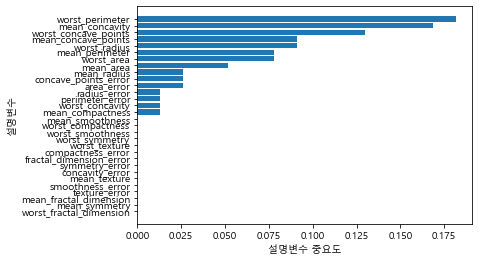

In [59]:
# 중요도가 높은 변수를 상위에 그림
df_importance.sort_values("Importance", ascending=True, inplace = True)
coordinates = range(len(df_importance))
plt.barh(y = coordinates, width = df_importance["Importance"])
plt.yticks(coordinates, df_importance["Feature"])
plt.xlabel("설명변수 중요도")
plt.ylabel("설명변수")

worst perimeter(세포최대둘레) ,mean concavity(세포의 평균 오목함), worst concave points (세포 최대 오목한 수) 순으로 중요도가 크다. 

의사결정나무와 비교했을 때 중요도의 크기와 중요도 순서가 다르게 나온다. 

In [60]:
# GridSearchCV를 이용한 최적 parameter 찾기
estimator = RandomForestClassifier(random_state=1234, n_estimators =100)
# 구하고자 하는 parameter와 범위
param_grid = {"max_depth": para_depth,"min_samples_leaf": para_leaf}
# 설명력이 높은 최적 parameter 찾기
grid_rf = GridSearchCV(estimator, param_grid, scoring="accuracy", n_jobs = -1)
grid_rf.fit(df_train_x, df_train_y)

print("best estimator model: \n{}".format(grid_dt.best_estimator_))
print("\nbest parameter: \n{}".format(grid_dt.best_params_))
print("\nbest score: \n{}".format(grid_dt.best_score_.round(3)))


best estimator model: 
DecisionTreeClassifier(max_depth=4, min_samples_leaf=2, min_samples_split=10)

best parameter: 
{'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 10}

best score: 
0.943


최대깊이가 4, 잎사귀의 최소 샘플수가 2, 분리 보드의 최소 자료수가 10 일때 정확도는 94.3% 인 것을 알 수있습니다